# <center> Bootstrapping Default Probabilities from CDS spreads <center>

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [96]:
# inputs
maturities = range(6)
discount_factors = [0, 0.97, 0.94, 0.92, 0.89, 0.86]
spreads = [0, 50, 79, 98, 112.5, 129]
recovery = 0.40

In [113]:
# Function that computes the survival probabilities
def Survival_Probabilities(spreads, discount_factors, maturities, recovery):   
    
    # Put all the input into a dataframe
    df = pd.DataFrame({'Maturity': maturities, 'Df':discount_factors, 'Spread':spreads})
    
    # convert spreads into basis points
    df['Spread'] = df['Spread']/10000 
    
    # create a time step column
    df['Δt'] = df['Maturity'].diff().fillna(0)
    
    # L = 1-R 
    L = 1-recovery
    
    # number of periods
    N_Period = df.shape[0]
    
    # create a survival probability column
    df['SP'] = [0]*N_Period
    
    # first 2 periods
    # SP: Survival Probability
    df['SP'].iloc[0] = 1
    df['SP'].iloc[1] = L/(L+df['Δt'].iloc[1]*df['Spread'].iloc[1])
    
    # Survival probabilities for N >=2
    for N in range(2,N_Period):
        
        numerator = 0
        
        for n in range(1,N):
        
            numerator = numerator + df['Df'].iloc[n]*(L*df['SP'].iloc[n-1]-\
                                            (L+df['Δt'].iloc[n]*df['Spread'].iloc[N])* \
                                            df['SP'].iloc[n])
        
        denominator = df['Df'].iloc[N]*(L+df['Δt'].iloc[N]*df['SP'].iloc[N])
        
        df['SP'].iloc[N] = numerator/denominator + (L*df['SP'].iloc[N-1])/ \
                           (L+df['Δt'].iloc[N]*df['Spread'].iloc[N])
    
    # Calculate the probability of default
    df['PD'] = 1 - df['SP']
    
    df.rename(columns = {'PD':'Default', 'SP':'Survival'}, inplace = True)
    
    return df

In [114]:
# call the user defined function
SP = Survival_Probabilities(spreads, discount_factors, maturities, recovery)
SP

,Maturity,Df,Spread,Δt,Survival,Default
0,0,0.00,0.00000,0.0,1.000000,0.000000
1,1,0.97,0.00500,1.0,0.991736,0.008264
2,2,0.94,0.00790,1.0,0.973901,0.026099
3,3,0.92,0.00980,1.0,0.951854,0.048146
4,4,0.89,0.01125,1.0,0.926967,0.073033
5,5,0.86,0.01290,1.0,0.896158,0.103842


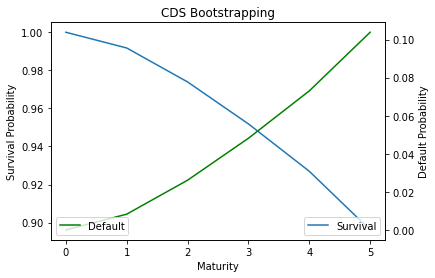

In [147]:
# Plot Survival probability and Default probability
ax = SP.plot(x = 'Maturity', y = 'Survival', legend = True)
ax2 = ax.twinx()
SP.plot(x="Maturity", y="Default", ax=ax2, legend=True, color="g")
ax.legend(loc='lower right')
ax2.legend(loc='lower left')
ax.set_ylabel('Survival Probability')
ax2.set_ylabel('Default Probability')
plt.title('CDS Bootstrapping')
plt.show()

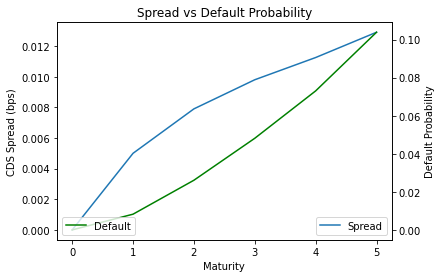

In [148]:
# Plot Survival probability and Default probability
ax = SP.plot(x = 'Maturity', y = 'Spread', legend = True)
ax2 = ax.twinx()
SP.plot(x="Maturity", y="Default", ax=ax2, legend=True, color="g")
ax.legend(loc='lower right')
ax2.legend(loc='lower left')
ax.set_ylabel('CDS Spread (bps)')
ax2.set_ylabel('Default Probability')
plt.title('Spread vs Default Probability')
plt.show()